# House pricing


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
X = train.copy()
Y = X['TARGET(PRICE_IN_LACS)']
X.drop(['TARGET(PRICE_IN_LACS)'], axis = 1, inplace=True)
X.drop(['BHK_OR_RK', 'ADDRESS', 'POSTED_BY'], axis=1, inplace=True)
X.isnull().values.any()

False

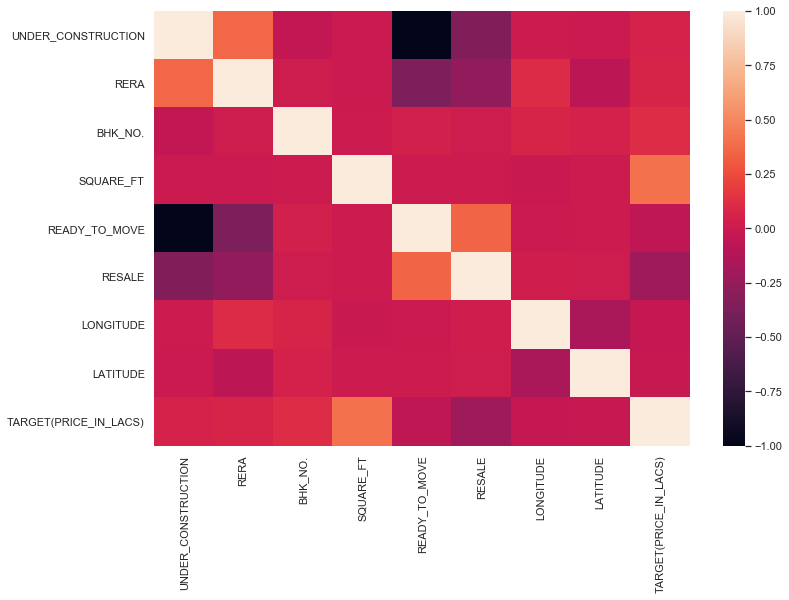

In [4]:
correlation_df = train.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(correlation_df)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))

0.220206267961795


In [6]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X,Y)
print(dtr.score(X, Y))

0.9999604223923442


In [7]:
test = pd.read_csv('test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [8]:
test.drop(['BHK_OR_RK', 'ADDRESS', 'POSTED_BY'], axis=1, inplace=True)
res = dtr.predict(test)

In [9]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [10]:
for i in range(0, res.shape[0]):
    sample.iloc[i,0] = res[i]

In [36]:
sample.head()

,TARGET(PRICE_IN_LACS)
0,19.4
1,81.0
2,72.0
3,26.0
4,19.2
